## <span style='color:LightGreen'>Imports and Defines

In [1]:
from IPython.display import display
from datetime import datetime as dt



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# graphics setup
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lato']

## <span style='color:Gold'>Reading data

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

print('Global confirmed cases')
display(confirmed_df.head())
print('Global death cases')
display(deaths_df.head())
print('Global recovered cases')
display(recovered_df.head())

Global confirmed cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263


Global death cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,142,142,142,142,142,144,144,144,144,144
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888


Global recovered cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Set **Province/State** column to index

In [3]:
confirmed_df.set_index('Province/State', inplace=True)
deaths_df.set_index('Province/State', inplace=True)
recovered_df.set_index('Province/State', inplace=True)

Number of unique countries

In [4]:
confirmed_df['Country/Region'].nunique()

196

## <span style='color:Gold'>Exploratory Analysis

### Group data by Country

In [5]:
confirmed_by_country_df = confirmed_df.groupby('Country/Region').sum()
deaths_by_country_df = deaths_df.groupby('Country/Region').sum()
recovered_by_country_df = recovered_df.groupby('Country/Region').sum()

confirmed_by_country_df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,...,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585


<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


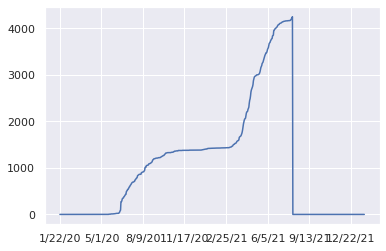

In [6]:
recovered_by_country_df.loc['Yemen'][2:].plot()

In [7]:
recovered_by_country_df.loc['Brazil'][2:].max()

recovered_by_country_df.iloc[:,2:].apply(lambda x : max(x), axis=1)

Country/Region
Afghanistan            82586
Albania               130314
Algeria               118409
Andorra                14380
Angola                 39582
                       ...  
Vietnam                54332
West Bank and Gaza    312320
Yemen                   4251
Zambia                189658
Zimbabwe               82994
Length: 196, dtype: int64

In [8]:
data_summary = pd.concat(  
        [confirmed_by_country_df.iloc[:,-1], # last column (total cases)
        deaths_by_country_df.iloc[:,-1], # last column (all deaths)
        recovered_by_country_df.iloc[:,2:].apply(lambda x : max(x), axis=1)], # get total recovered cases
        axis=1)
data_summary.columns = ['Total_cases','Deaths','Recovery']
data_summary['Current_cases'] = data_summary.Total_cases - data_summary.Deaths - data_summary.Recovery
data_summary

,Total_cases,Deaths,Recovery,Current_cases
Country/Region,,,,
Afghanistan,159896,7393,82586,69917
Albania,248070,3305,130314,114451
Algeria,238885,6508,118409,113968
Andorra,33025,144,14380,18501
Angola,97263,1888,39582,55793
...,...,...,...,...
Vietnam,2155784,36884,54332,2064568
West Bank and Gaza,484979,5056,312320,167603
Yemen,10585,1995,4251,4339


<AxesSubplot:>

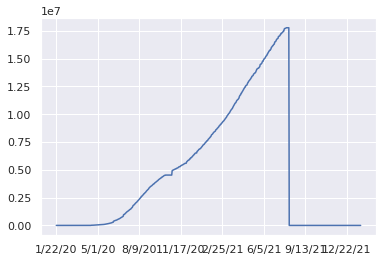

In [9]:
recovered_by_country_df.loc['Brazil'][2:].plot()

In [10]:
data_summary.loc['Brazil']

Total_cases      24142032
Deaths             623636
Recovery         17771228
Current_cases     5747168
Name: Brazil, dtype: int64

In [11]:
21844293 - 17771228

4073065

In [12]:
23229851 - 621803 - 817292

21790756

In [13]:
data_summary.Recovery.value_counts()

0          5
4251       2
3          2
82586      1
100912     1
          ..
390827     1
3659260    1
98633      1
93764      1
82994      1
Name: Recovery, Length: 190, dtype: int64

### Moving Average

In [14]:
br_newcases = confirmed_by_country_df.loc['Brazil'][2:].diff()
ma_days = 7

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


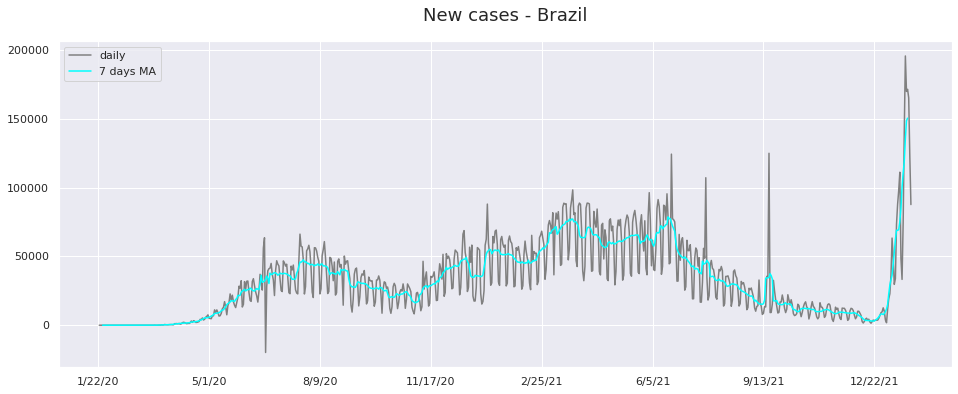

In [15]:
plt.figure(figsize=(16,6))

br_newcases.plot(label='daily', color='gray')
br_newcases.rolling(ma_days).mean().shift(-3).plot(label=f'{ma_days} days MA', color='cyan')

plt.title('New cases - Brazil', fontsize=18, pad=20)
plt.legend();

In [16]:
confirmed_by_country_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


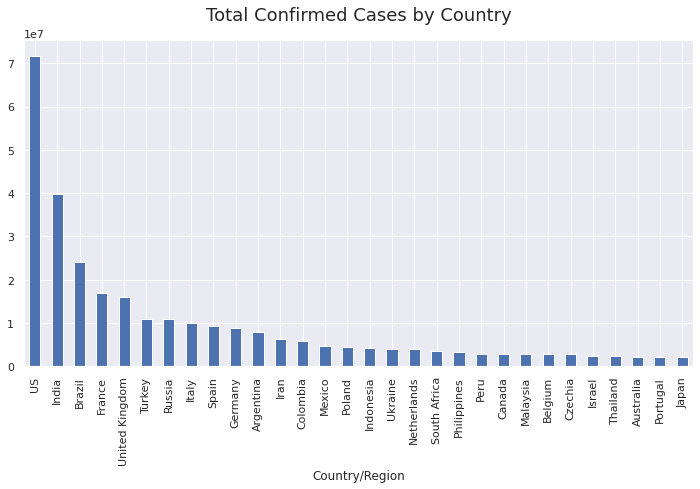

In [17]:
plt.figure(figsize=(12,6))

confirmed_by_country_df.iloc[:,-1].sort_values(ascending=False)[:30].plot(kind='bar')
plt.title('Total Confirmed Cases by Country', fontsize=18, pad=20);

### Lethaliy Rate

In [18]:
data_summary['Lethality_rate'] = data_summary['Deaths'] / data_summary['Total_cases'] * 100
# alternative method
#data_summary['Lethality_rate'] = data_summary['Deaths'] / (data_summary['Deaths'] + data_summary['Recovery']) * 100
data_summary.head()

,Total_cases,Deaths,Recovery,Current_cases,Lethality_rate
Country/Region,,,,,
Afghanistan,159896,7393,82586,69917,4.623630
Albania,248070,3305,130314,114451,1.332285
Algeria,238885,6508,118409,113968,2.724323
Andorra,33025,144,14380,18501,0.436033
Angola,97263,1888,39582,55793,1.941129


In [19]:
data_summary['Lethality_rate'].describe()

count    196.000000
mean       1.862251
std        2.466721
min        0.000000
25%        0.798429
50%        1.271736
75%        2.270835
max       22.222222
Name: Lethality_rate, dtype: float64

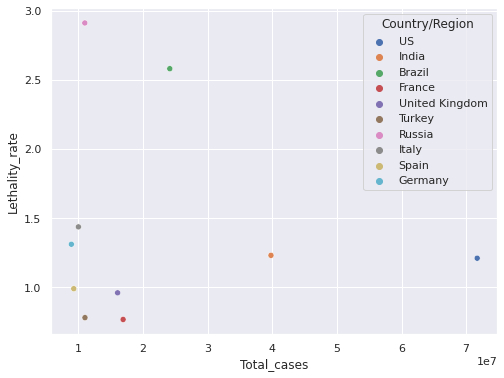

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_summary.sort_values('Total_cases', ascending=False).iloc[:10,:], 
                x='Total_cases', y='Lethality_rate', hue='Country/Region');

### Creating Pivot table for plotting Heatmap

In [21]:
# Remove first two columns
confirmed_by_country_pivot = confirmed_by_country_df.drop(columns=['Lat','Long'])
# Rename coluns to [Month_name]/[Year] format
confirmed_by_country_pivot.columns = [dt.strptime(column,'%m/%d/%y').strftime('%B/%y') for column in confirmed_by_country_pivot.columns]
# Group values by month
confirmed_heatmap = confirmed_by_country_pivot.groupby(confirmed_by_country_pivot.columns, axis=1, sort=False).sum()
# Calculate the unique values for each month
confirmed_heatmap = confirmed_heatmap.diff(axis=1).fillna(confirmed_heatmap)

<AxesSubplot:ylabel='Country/Region'>

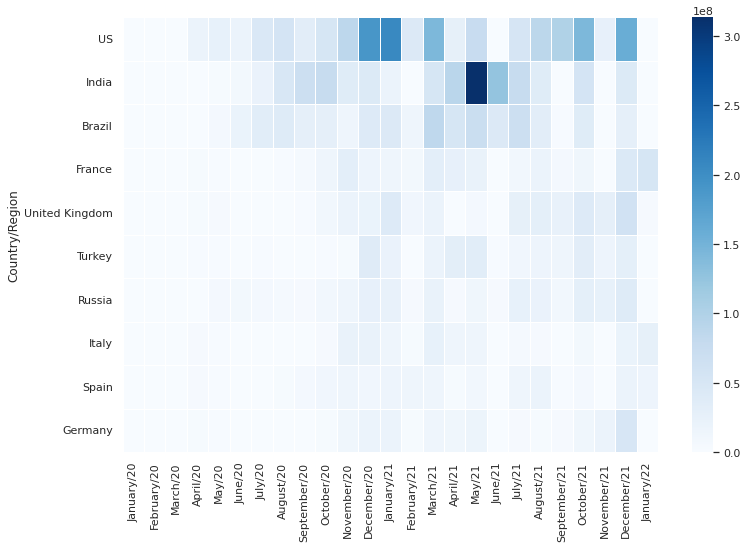

In [22]:
plt.figure(figsize=(12,8))
# top 10 contries with more confirmed cases
sns.heatmap(confirmed_heatmap.loc[confirmed_by_country_df.iloc[:,-1].sort_values(ascending=False)[:10].index], 
            cmap='Blues', linecolor='white', linewidth=1, vmin=0)


## <span style='color:Gold'>Exploratory Analysis Part II

### Normalized Data Comparision

In [23]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# scale new cases
confirmed_normalize = confirmed_by_country_df.loc['Brazil'][2:].diff().values
confirmed_scaled = min_max_scaler.fit_transform(confirmed_normalize.reshape(-1, 1))
confirmed_br = pd.DataFrame(confirmed_scaled).iloc[:,0]
# scale new deaths
deaths_normalize = deaths_by_country_df.loc['Brazil'][2:].diff().values
death_scaled = min_max_scaler.fit_transform(deaths_normalize.reshape(-1, 1))
deaths_br = pd.DataFrame(death_scaled).iloc[:,0]
# scale new recoveries
recovered_by_day_Brazil = recovered_by_country_df.loc['Brazil'][2:].diff().values
recovered_by_day_Brazil[recovered_by_day_Brazil < 0] = 0
recovery_scaled = min_max_scaler.fit_transform(recovered_by_day_Brazil.reshape(-1, 1))
recovery_br = pd.DataFrame(recovery_scaled).iloc[:,0]

In [24]:
# all reported dates
date_timeline = confirmed_by_country_df.columns[2:]
# set index with date
confirmed_br.set_axis(date_timeline, inplace=True)
deaths_br.set_axis(date_timeline, inplace=True)
recovery_br.set_axis(date_timeline, inplace=True)

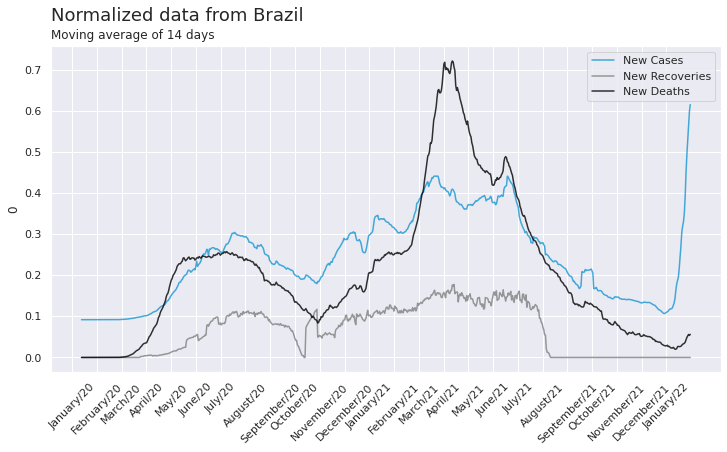

In [25]:
days = 14
confirmed_ma = confirmed_br.rolling(days).mean().shift(-3)
deaths_ma = deaths_br.rolling(days).mean().shift(-3)
recovery_ma = recovery_br.rolling(days).mean().shift(-3)

plt.figure(figsize=(12,6))
sns.lineplot(data=confirmed_ma, label='New Cases', color='#1696d2', alpha=0.8)
sns.lineplot(data=recovery_ma, label='New Recoveries', color='grey', alpha=0.8)
sns.lineplot(data=deaths_ma, label='New Deaths', color='black', alpha=0.8)
plt.suptitle(f'Moving average of {days} days\n', fontsize=12, x=0.22,y=0.92)
plt.title('Normalized data from Brazil', fontsize=18, loc='left', pad=25) 
plt.legend()
plt.xticks(ticks=np.arange(0, 731, 29.24), labels=confirmed_by_country_pivot.columns.unique(), rotation=45)
plt.show()

<AxesSubplot:>

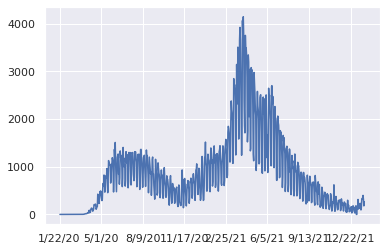

In [26]:
deaths_by_country_df.iloc[:,2:].loc['Brazil'].diff().plot()

### Other